# King County Realestate Endeavors


## Business Understanding
- The key stakeholders for this analysis project are potential home buyers who are coming to the king county area
- We are using a data set of recent house sales in king county from 2021-2022 to create a predictive model
- We used predictive modeling to predict prices based on certain home features
- Our first recommendation would to be use the tool we created to get prospective homes
- Our second recommendation would be that once a potential home buyer does buy their home, to bolster certain features of their homes to add value

## Data Understanding/Data Preperation

In [1]:
#importing all packeges required for code below
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#dataset
kcdf = pd.read_csv('../data/kc_house_data.csv')

In [3]:
#dropping this column because it is insignificant for our data wrangling purposes
kcdf = kcdf.drop(columns = 'date')

In [4]:
#dropping all the nulls from the dataframe
kcdf = kcdf.dropna()

In [5]:
#function to get all the zipcodes from the addresses
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [6]:
#creating a zip code column from the address columns using our zip code function.
kcdf['zip_code'] = kcdf['address'].apply(lambda x: zip_code(x))

In [7]:
#converting the zip code column from a string to an integer
kcdf['zip_code'] = kcdf['zip_code'].astype(int)

In [179]:
#from the government database, we filtered all of the zipcodes from King County and inputted them here
kc_zips = [98001, 98002,98003, 98004,98005,98006, 98007,98008,98009, 98010, 98011, 98013, 98014,98015,98019,98022,98023,98024,98025,98027,98028,98029,98030,98031,98032,98033,98034,98035,98038,98039,98040,98041,98042,98045,98047,98050,98051,98052,98053,98054,98055,98056,98057,98058,98059,98062,98063,98064,98065,98070,98071,98072,98073,98074,98075,98077,98083,98089,98092,98093,98101,98102,98103,98104,98105,98106,98107,98108,98109,98111,98112,98113,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98127,98129,98131,98132,98133,98134,98136,98138,98139,98141,98144,98145,98146,98148,98151,98154,98155,98158,98160,98161,98164,98165,98166,98168,98170,98171,98174,98175,98177,98178,98181,98184,98185,98188,98190,98191,98194,98195,98198,98199,98224,98288]

In [9]:
#filtered our data to make sure that the housing sales in our data are actually from King County
realkcdf = kcdf[kcdf['zip_code'].isin(kc_zips)]

Implementing Zip Codes function is key because there were house sales in our data set that didnt have the  

In [10]:
#Checking how many zip codes in King County had house sales in our data set
realkcdf['zip_code'].nunique()

76

In [11]:
#Function to take two coordinated and calculate distance in miles
def geo_distance(coord_a, coord_b):
    
    return geodesic(coord_a, coord_b).miles

In [12]:
#Amazon headquarter coordinates
amzn_coord = (47.615722, -122.339494)

In [13]:
#zipping the columns lat and long into one column called location
realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))

/var/folders/vd/6t9vjg9j7t9dfc844730ntn80000gn/T/ipykernel_5958/866223276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))


In [14]:
#creating a column called distance to amazon using the location column and amazon coordinates. Distance is measured in miles
realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)

/var/folders/vd/6t9vjg9j7t9dfc844730ntn80000gn/T/ipykernel_5958/483014784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)


In [296]:
#Filter data to have only the houses that were sold with in three miles of Amazon
data_near_amzn = realkcdf[realkcdf['distance_to_amazon'] <= 3]

In [297]:
#filtering out one of the big outliers
data_near_amzn_filt = data_near_amzn[data_near_amzn['price'] < 10000000]

In [303]:
data_near_amzn_filt['zip_code'].nunique()

12

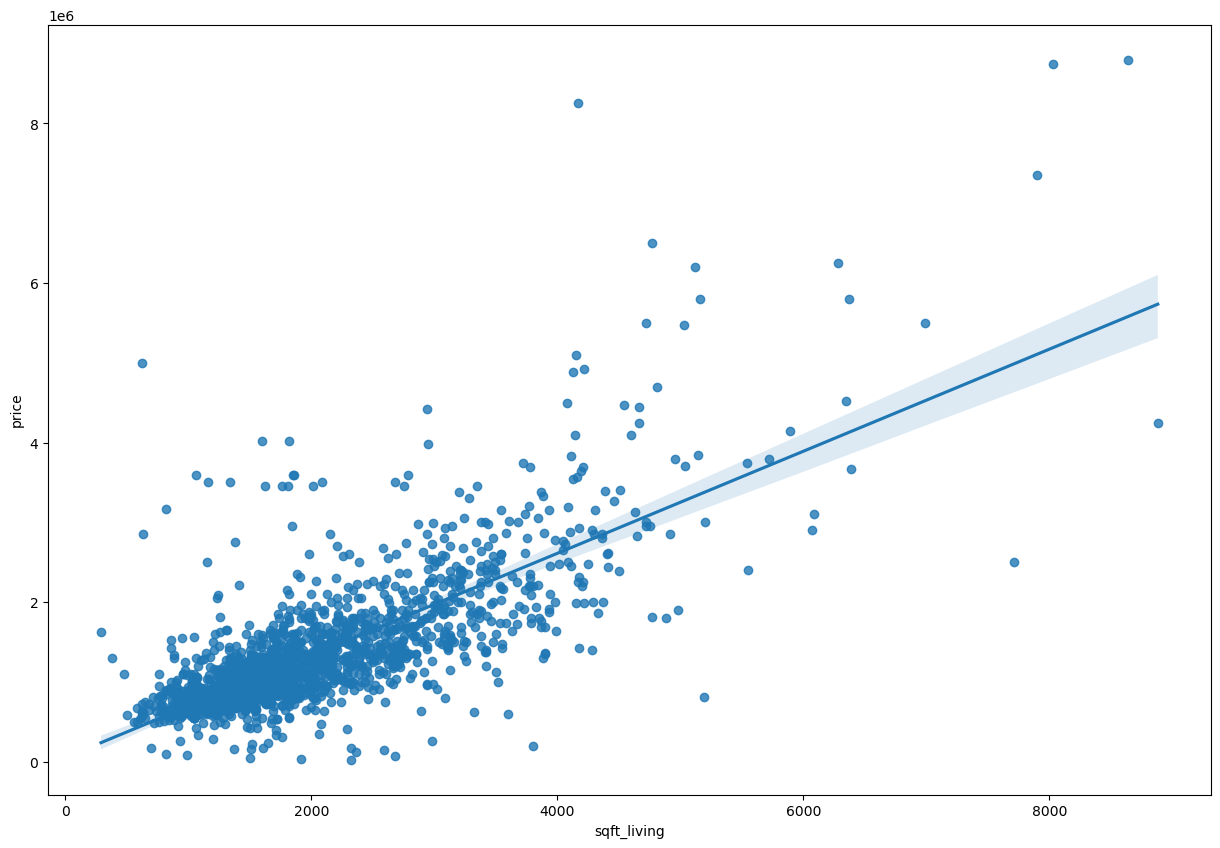

In [17]:
#plotting the regression and relationship of the sqft of living vs the price of the actual values of sold prices 
fig, ax = plt.subplots(figsize = (15,10))

x = data_near_amzn_filt['sqft_living']
y = data_near_amzn_filt['price']
hue = data_near_amzn_filt['bedrooms']
size = data_near_amzn_filt['bathrooms']


sns.regplot(x = x, y = y,  ax=ax);


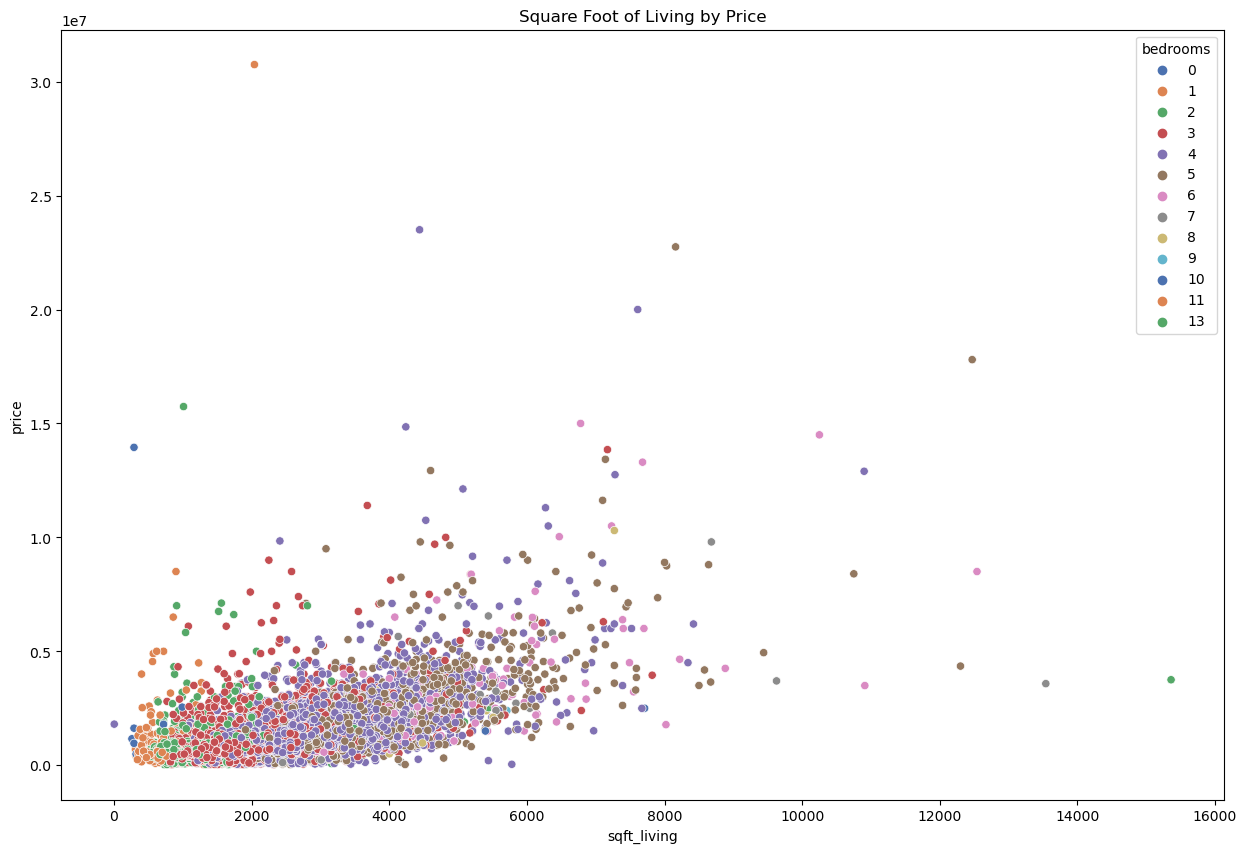

In [18]:
#plotting the relationship of sqft of living vs price with bedrooms and bathrooms as other factors
fig, ax = plt.subplots(figsize = (15,10))

x = realkcdf['sqft_living']
y = realkcdf['price']
hue = realkcdf['bedrooms']
size = realkcdf['bathrooms']
#hue = hue, palette = 'deep', size = size,

sns.scatterplot(x = x, y = y, hue = hue, palette = 'deep', ax=ax)
ax.set_title('Square Foot of Living by Price');

TypeError: barplot() got multiple values for argument 'data'

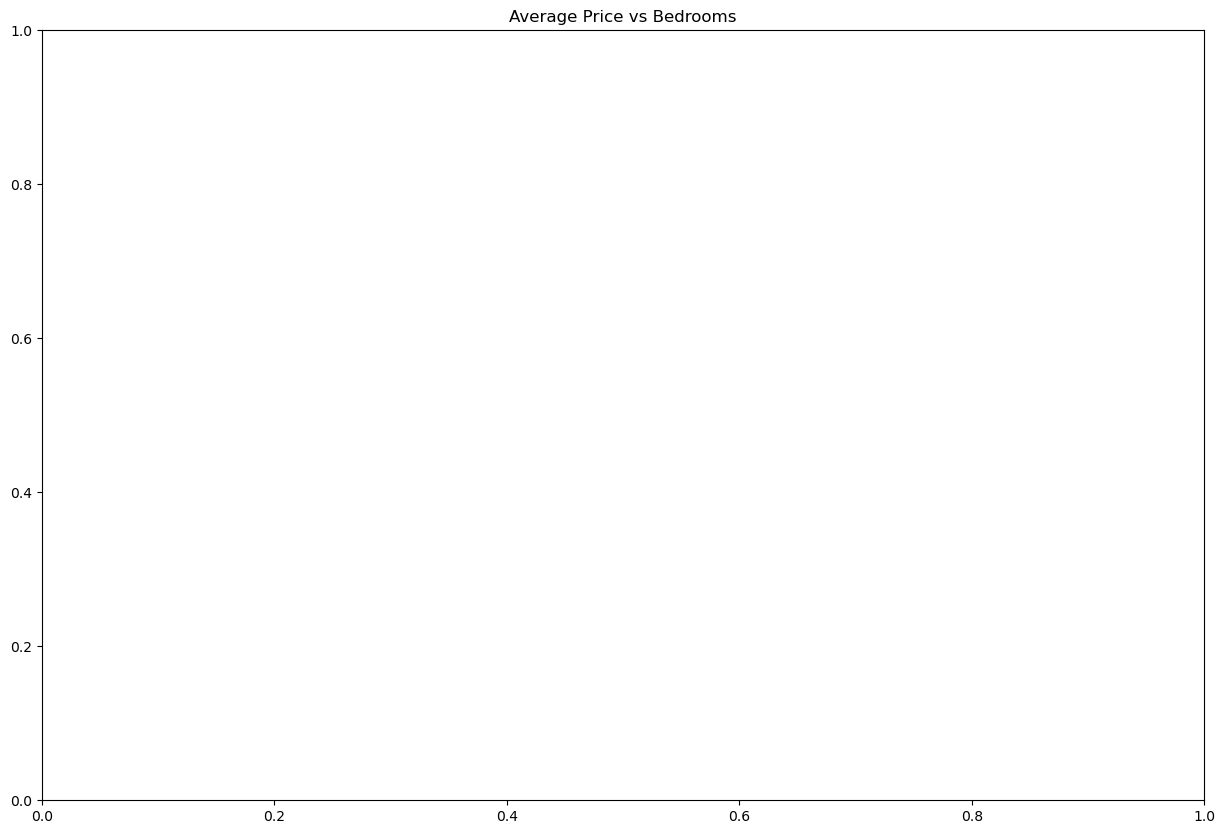

In [21]:
#plotting the view category and the mean price for each
fig, ax = plt.subplots(figsize = (15,10))

x = realkcdf['bedrooms']
y = realkcdf['price']
ax.set_title('Average Price vs Bedrooms')


sns.barplot(x, y, data = realkcdf, ax = ax);

In [20]:
#q1 = realkcdf['price'].quantile(.25)
#q3 = realkcdf['price'].quantile(.75)
#IQR = q3 - q1
#outliers = realkcdf[((realkcdf['price']<(q1-1.5*IQR)) | (realkcdf['price']>(q3+1.5*IQR)))]

In [21]:
#outliers

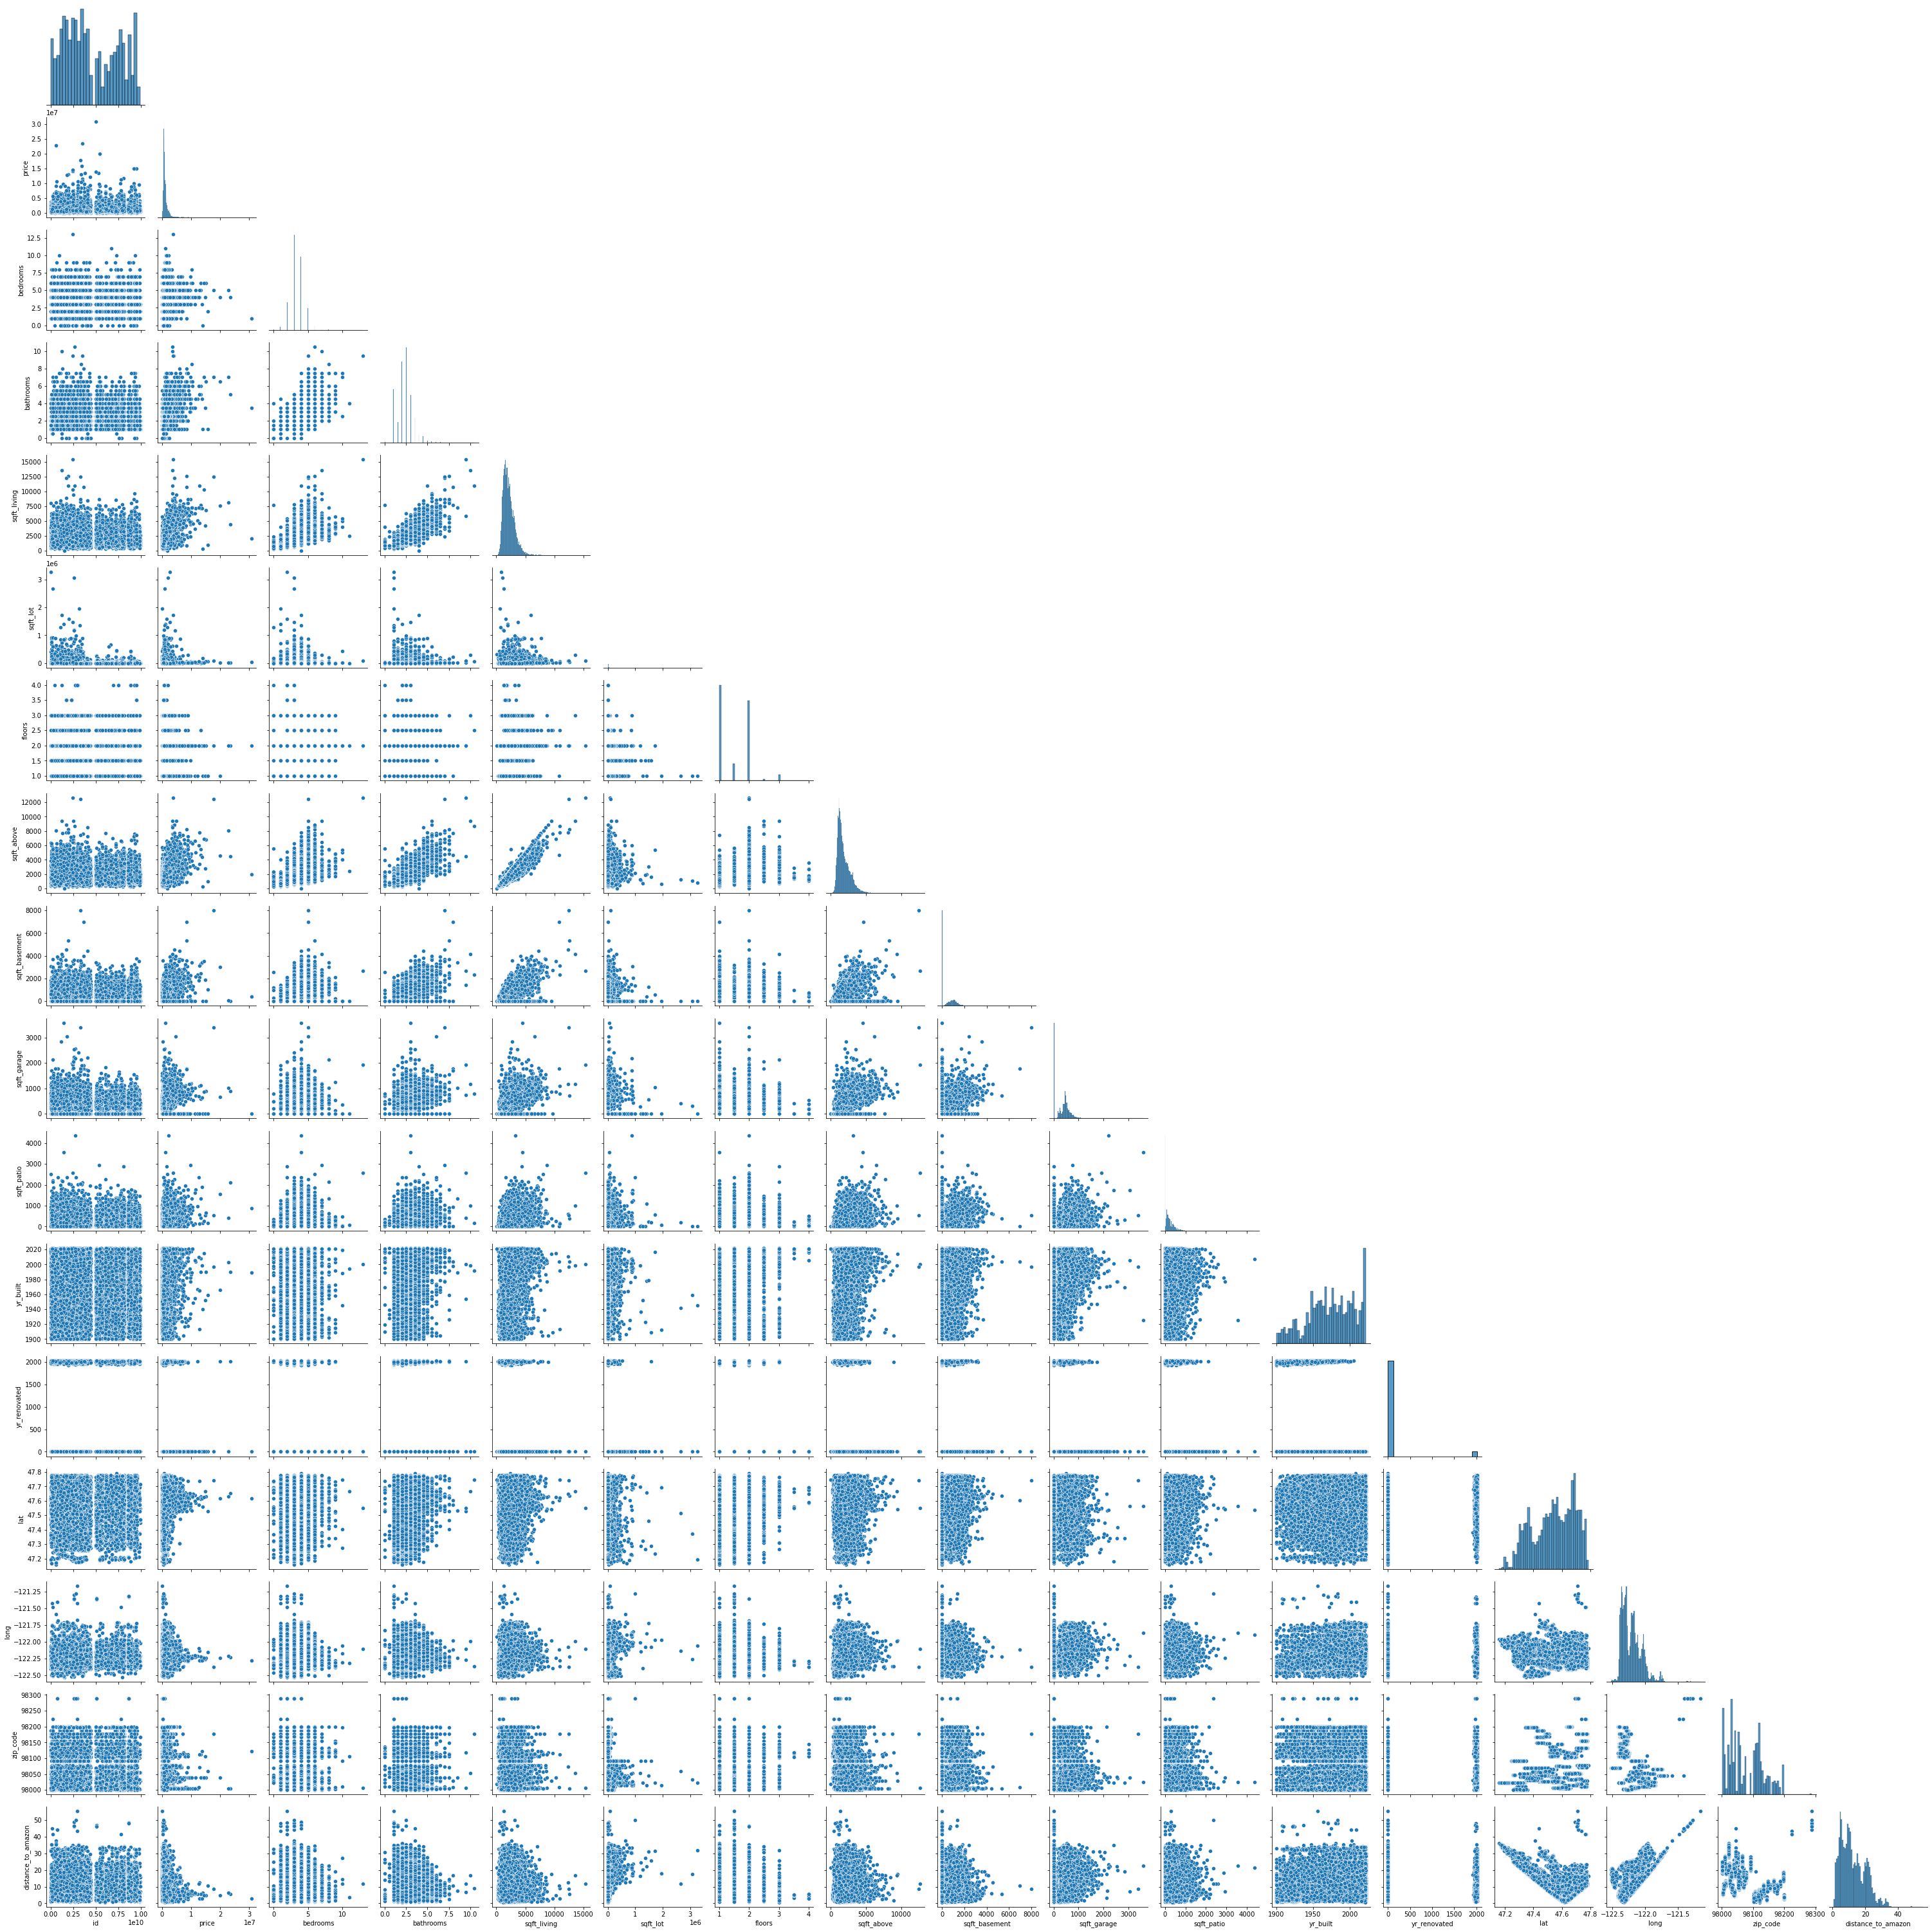

In [22]:
#creating a pairplot to look at relationships of all numerical values
sns.pairplot(realkcdf, corner = True);

/var/folders/vd/6t9vjg9j7t9dfc844730ntn80000gn/T/ipykernel_5958/3045643398.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(realkcdf.corr(), annot = True);


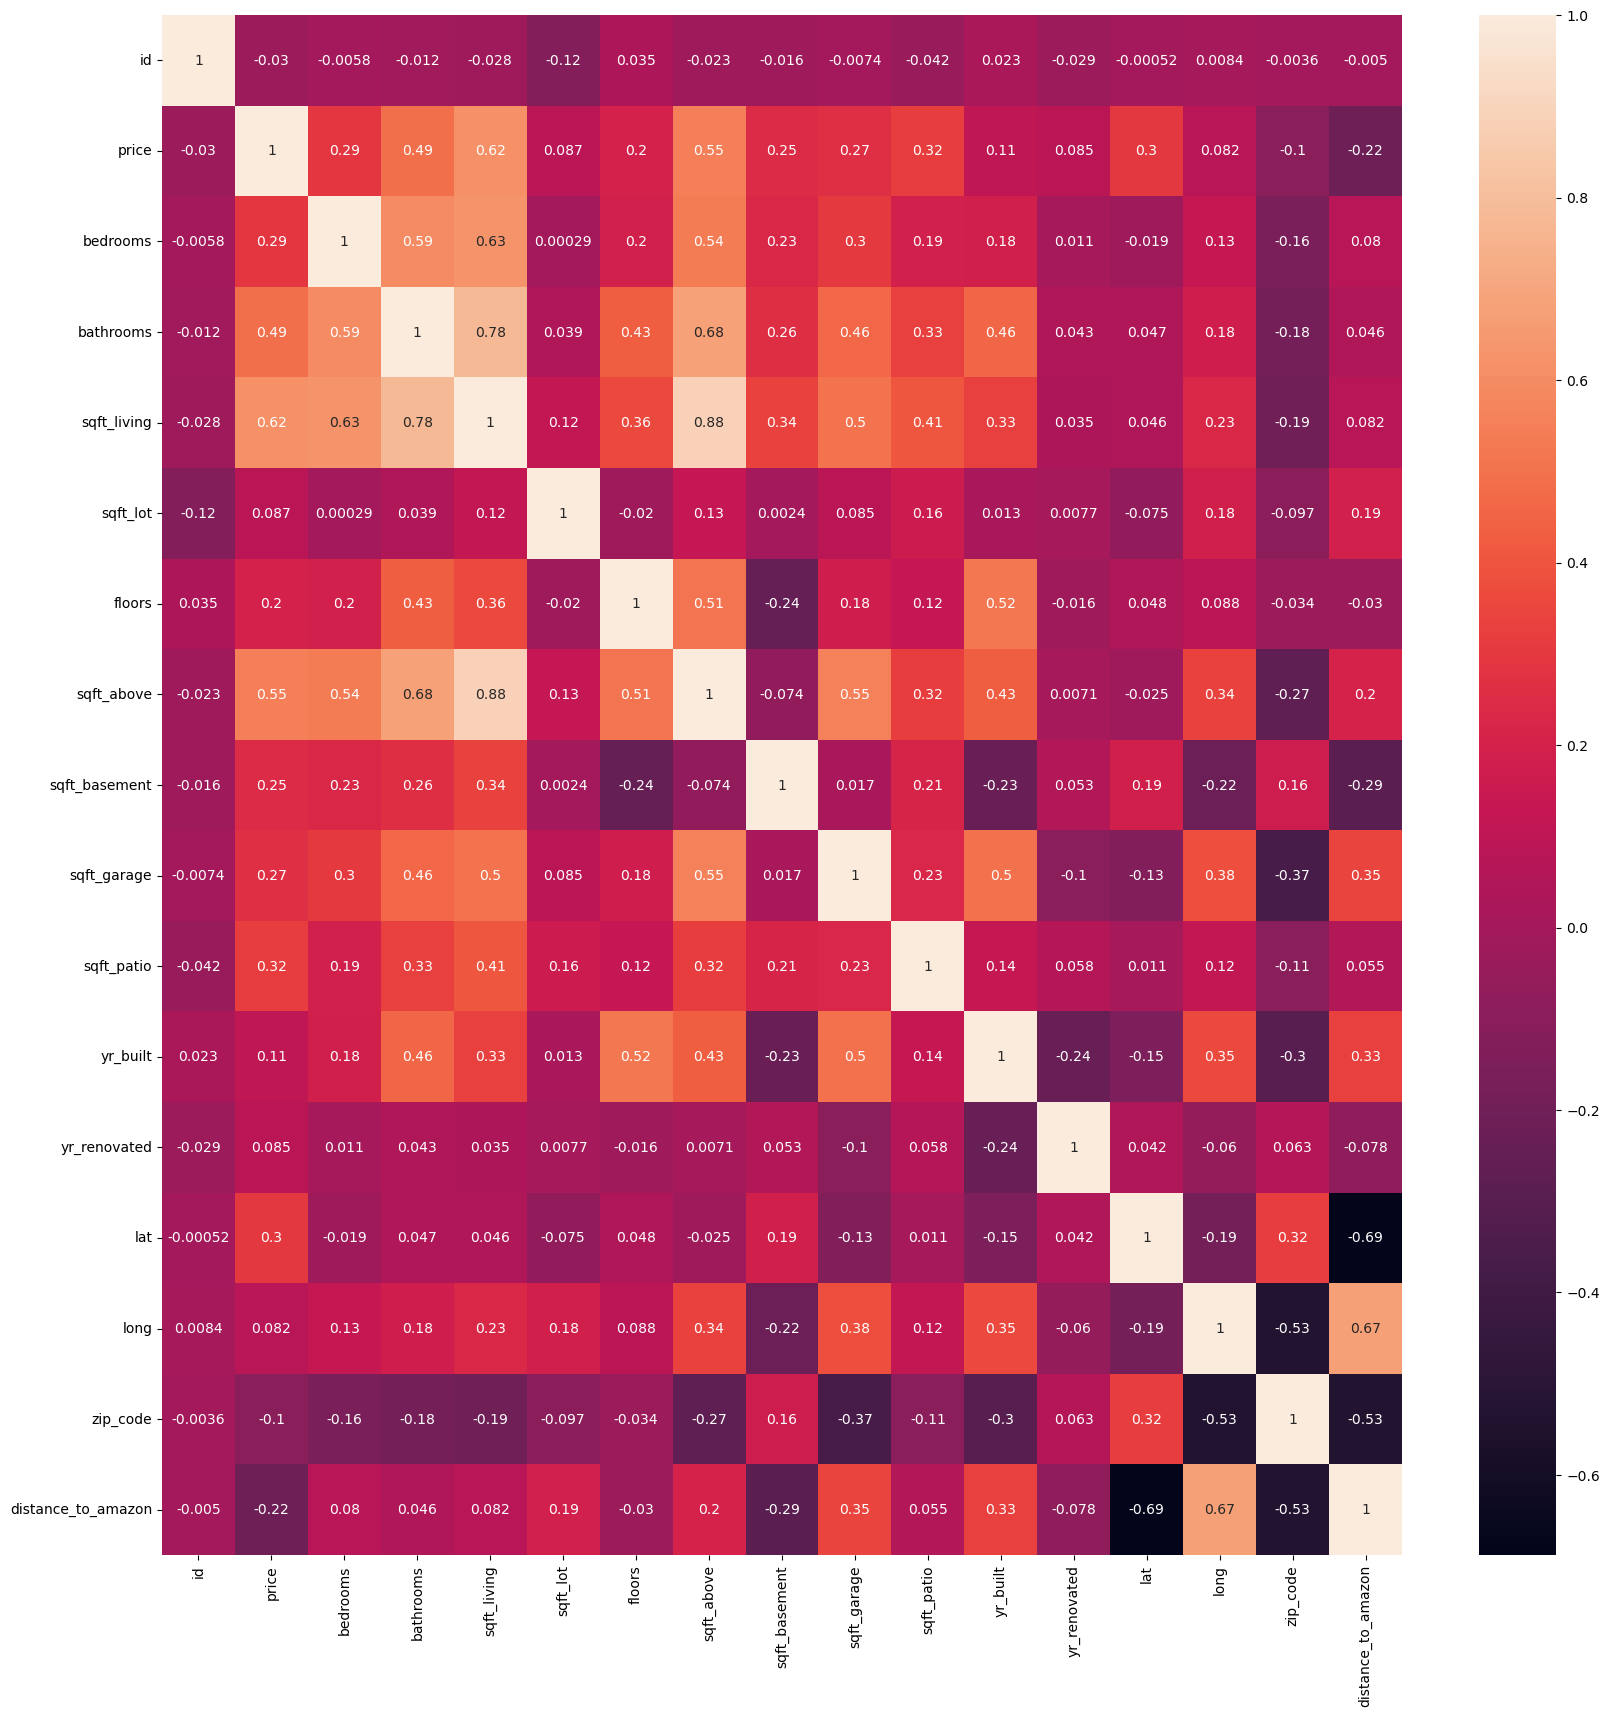

In [25]:
#plotting a heatmap to look at the collinearity of dependent variables
plt.figure(figsize = (20,20))
sns.heatmap(realkcdf.corr(), annot = True);

In [26]:
#creating lists to put in the ordinal encoder
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [27]:
#Ordinal encoding lists and creating an ordinal datafram
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [28]:
#concatenating the realkcdf and ordinal dataframes and 
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

/var/folders/vd/6t9vjg9j7t9dfc844730ntn80000gn/T/ipykernel_5958/895768639.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)


In [29]:
#Onehot Encoding
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [30]:
#makeing a list of what columns I want to onehot encode
nominal_cols = ['waterfront', 'greenbelt', 'nuisance','heat_source', 'sewer_system','zip_code']

In [31]:
#Fit_transforming the nominal columns and making it equeal to variable
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

/Users/eitan/anaconda3/envs/Number41/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [109]:
#creating a nominal dataframe creating columns
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names_out())

In [110]:
#Concatenating the two data frames while dropping the columns names from the first data fram and adding the columns names from the second data frame
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

/var/folders/vd/6t9vjg9j7t9dfc844730ntn80000gn/T/ipykernel_5958/692917169.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)


In [284]:
cleandf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
0,0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29145,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29146,30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29147,30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### FSM

In [308]:
zips

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location,distance_to_amazon
88,9828702665,1061000.0,3,2.5,1490,959,2.0,NO,NO,NO,...,0,0,2005,0,"1826B 24th Ave, Seattle, Washington 98122, Uni...",47.618300,-122.301050,98122,"(47.6183, -122.30105)",1.804614
97,424049012,725000.0,4,3.5,1630,1717,3.0,NO,NO,NO,...,260,0,2009,0,"820 28th Avenue South, Seattle, Washington 981...",47.595175,-122.296265,98144,"(47.595175, -122.296265)",2.468694
181,9103000296,1400000.0,3,2.0,1500,3760,1.5,NO,NO,NO,...,200,0,1926,0,"3412 East Florence Court, Seattle, Washington ...",47.618960,-122.288610,98112,"(47.61896, -122.28861)",2.387392
195,3319502178,782000.0,3,3.5,1440,2041,2.0,NO,NO,NO,...,200,0,2006,0,"1629 South Weller Street, Seattle, Washington ...",47.597320,-122.310205,98144,"(47.59732, -122.310205)",1.867842
202,8873000062,4885000.0,4,3.5,4130,7655,2.0,NO,NO,NO,...,0,530,1925,0,"119 Tower Place, Seattle, Washington 98109, Un...",47.630445,-122.354770,98109,"(47.630445, -122.35477)",1.242445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,6003501586,1384375.0,4,3.0,2010,3200,1.5,NO,NO,YES,...,0,70,1901,1988,"1122 East John Street, Seattle, Washington 981...",47.620125,-122.317155,98102,"(47.620125, -122.317155)",1.086918
30120,5244801455,1400000.0,3,2.0,2560,6441,2.0,NO,NO,NO,...,0,190,1908,0,"153 Newell Street, Seattle, Washington 98109, ...",47.644480,-122.354280,98109,"(47.64448, -122.35428)",2.103351
30123,7234600807,969000.0,3,2.5,1660,1795,2.0,NO,NO,NO,...,200,70,2000,0,"914A 17th Ave, Seattle, Washington 98122, Unit...",47.610500,-122.310050,98122,"(47.6105, -122.31005)",1.422021
30141,6362900076,815000.0,3,2.0,1330,1191,2.0,NO,NO,NO,...,0,0,2010,0,"724 25th Ave S, Seattle, Washington 98144, Uni...",47.596470,-122.299840,98144,"(47.59647, -122.29984)",2.280688


In [351]:
zips = realkcdf[realkcdf['distance_to_amazon'] < 2.75]

In [355]:
zips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 88 to 30152
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1545 non-null   int64  
 1   price               1545 non-null   float64
 2   bedrooms            1545 non-null   int64  
 3   bathrooms           1545 non-null   float64
 4   sqft_living         1545 non-null   int64  
 5   sqft_lot            1545 non-null   int64  
 6   floors              1545 non-null   float64
 7   waterfront          1545 non-null   object 
 8   greenbelt           1545 non-null   object 
 9   nuisance            1545 non-null   object 
 10  view                1545 non-null   object 
 11  condition           1545 non-null   object 
 12  grade               1545 non-null   object 
 13  heat_source         1545 non-null   object 
 14  sewer_system        1545 non-null   object 
 15  sqft_above          1545 non-null   int64  
 16  sqft

In [342]:
zip_list = list(zips['zip_code'].unique())

In [360]:
zip_list = [98122, 98144, 98112, 98109, 98102, 98103, 98119, 98199]

In [361]:
zip_list = [98122, 98144, 98112, 98109, 98102, 98103, 98119, 98199]

In [364]:
top_8_zips = realkcdf[realkcdf['zip_code'].isin(zip_list)]

In [366]:
top_8_zips['zip_code'].unique()

array([98144, 98103, 98199, 98112, 98122, 98119, 98109, 98102])

In [368]:
top_8_zips.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'zip_code', 'location', 'distance_to_amazon'],
      dtype='object')

In [374]:
top_8_zips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 10 to 30152
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2871 non-null   int64  
 1   price               2871 non-null   float64
 2   bedrooms            2871 non-null   int64  
 3   bathrooms           2871 non-null   float64
 4   sqft_living         2871 non-null   int64  
 5   sqft_lot            2871 non-null   int64  
 6   floors              2871 non-null   float64
 7   waterfront          2871 non-null   object 
 8   greenbelt           2871 non-null   object 
 9   nuisance            2871 non-null   object 
 10  view                2871 non-null   object 
 11  condition           2871 non-null   object 
 12  grade               2871 non-null   object 
 13  heat_source         2871 non-null   object 
 14  sewer_system        2871 non-null   object 
 15  sqft_above          2871 non-null   int64  
 16  sqft

/var/folders/vd/6t9vjg9j7t9dfc844730ntn80000gn/T/ipykernel_5958/1412310428.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top_8_zips.corr(), annot = True);


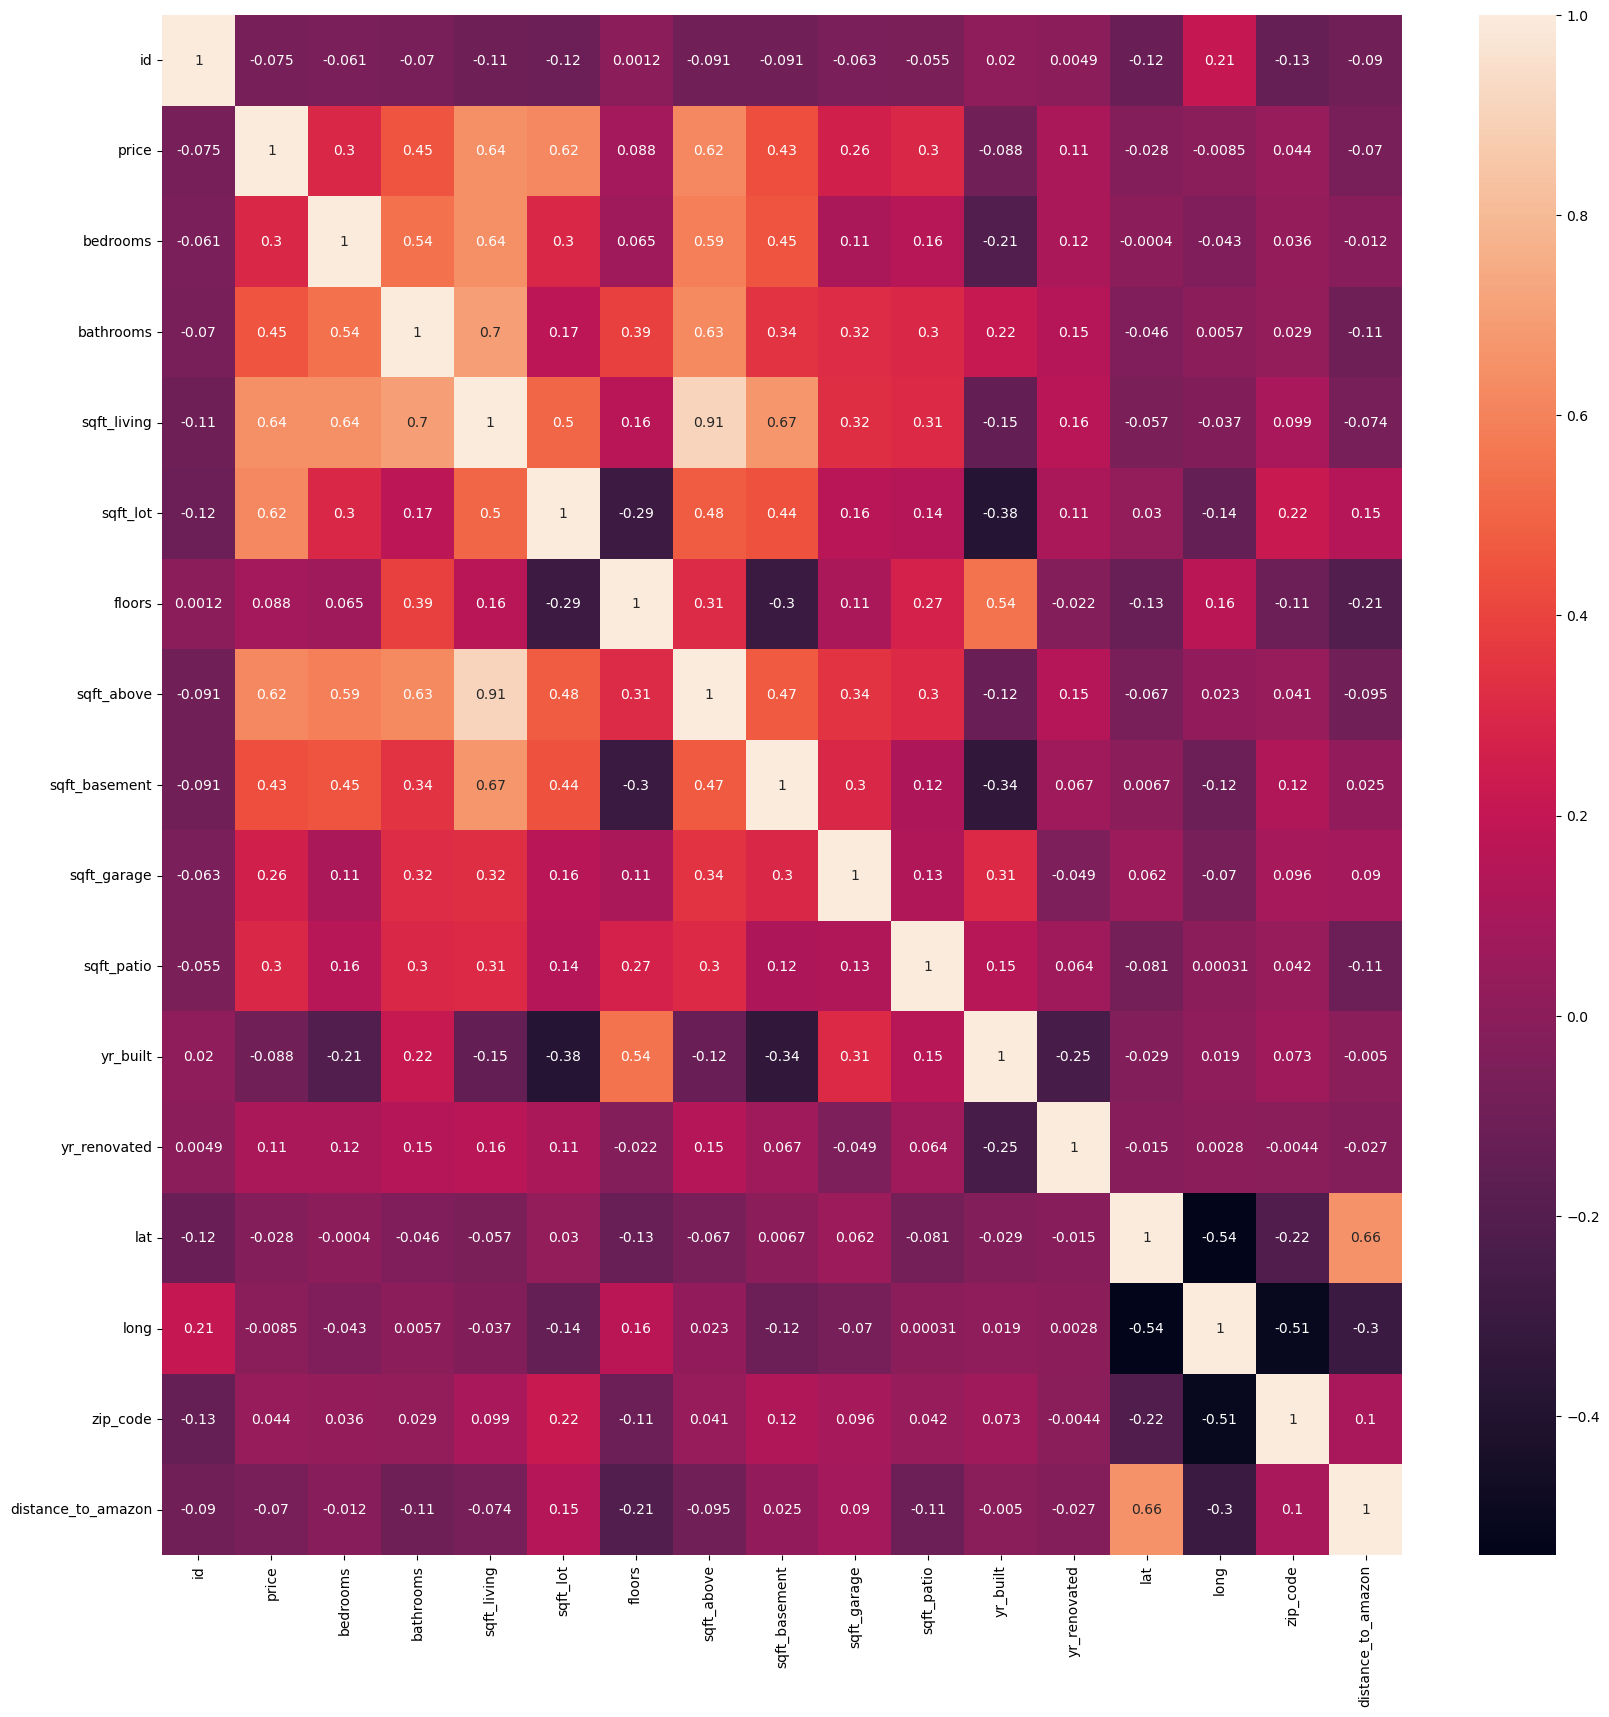

In [373]:
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(top_8_zips.corr(), annot = True);

In [349]:
zip_list = zip_list.pop()

In [350]:
zip_list

98107

In [333]:
zips['zip_code'].value_counts()

98122    440
98144    264
98112    254
98119    217
98102    144
98109    128
98103     83
98199     13
98107      1
98116      1
Name: zip_code, dtype: int64

In [287]:
dist = realkcdf[realkcdf['distance_to_amazon'] < 2]

In [291]:
dist

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location,distance_to_amazon
88,9828702665,1061000.0,3,2.5,1490,959,2.0,NO,NO,NO,...,0,0,2005,0,"1826B 24th Ave, Seattle, Washington 98122, Uni...",47.618300,-122.301050,98122,"(47.6183, -122.30105)",1.804614
195,3319502178,782000.0,3,3.5,1440,2041,2.0,NO,NO,NO,...,200,0,2006,0,"1629 South Weller Street, Seattle, Washington ...",47.597320,-122.310205,98144,"(47.59732, -122.310205)",1.867842
202,8873000062,4885000.0,4,3.5,4130,7655,2.0,NO,NO,NO,...,0,530,1925,0,"119 Tower Place, Seattle, Washington 98109, Un...",47.630445,-122.354770,98109,"(47.630445, -122.35477)",1.242445
214,6852700115,1140000.0,4,2.5,1830,2680,2.0,NO,NO,YES,...,0,70,1906,0,"433 12th Avenue East, Seattle, Washington 9810...",47.622985,-122.317000,98102,"(47.622985, -122.317)",1.164362
215,3325049068,845000.0,3,3.0,1590,1071,2.0,NO,NO,YES,...,220,0,2005,0,"1746 23rd Avenue, Seattle, Washington 98122, U...",47.617535,-122.302115,98122,"(47.617535, -122.302115)",1.750555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29944,1710400050,1100000.0,4,2.5,1920,3200,2.0,NO,NO,YES,...,0,220,1900,0,"800 14th Avenue, Seattle, Washington 98122, Un...",47.609365,-122.313815,98122,"(47.609365, -122.313815)",1.277489
30052,4226900211,820000.0,3,2.0,1600,1489,2.0,NO,NO,YES,...,0,550,2016,0,"210 14th Avenue, Seattle, Washington 98122, Un...",47.603850,-122.313935,98122,"(47.60385, -122.313935)",1.448632
30083,1860600140,3395000.0,4,4.5,4390,5300,3.0,NO,NO,NO,...,500,950,1991,0,"1624 8th Avenue West, Seattle, Washington 9811...",47.634320,-122.367305,98119,"(47.63432, -122.367305)",1.827032
30105,6003501586,1384375.0,4,3.0,2010,3200,1.5,NO,NO,YES,...,0,70,1901,1988,"1122 East John Street, Seattle, Washington 981...",47.620125,-122.317155,98102,"(47.620125, -122.317155)",1.086918


In [290]:
sorted(dist['zip_code'].unique())

[98102, 98109, 98112, 98119, 98122, 98144]

In [111]:
#sustantiating the LinearRegression
lr = LinearRegression()

In [112]:
col_select1 = realkcdf.drop(columns = ['price', 'id', 'waterfront', 'nuisance', 'waterfront', 'greenbelt', 'view', 'condition', 'grade','heat_source', 'sewer_system', 'address', 'zip_code', 'location', 'distance_to_amazon' ]).columns
X = realkcdf[col_select1]
y = realkcdf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [113]:
#fitting the data to the regression
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
#R^2 score of the training data
lr.score(X_train, y_train)

0.47994009714103036

In [115]:
y_pred = lr.predict(X_test)

In [118]:
lr.score(X_train,y_train)

0.47994009714103036

In [119]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

336371.95089820627

In [120]:
#sustantiating StandardScalar
ss = StandardScaler()

In [121]:
#Standard scaling the X train data
ss.fit(X_train)

StandardScaler()

In [122]:
#
X_standardized_train = ss.fit_transform(X_train)

In [123]:
#
X_standardized_test = ss.transform(X_test)

In [124]:
#
lr.fit(X_standardized_train, y_train)
lr.score(X_standardized_train, y_train)

0.4799400971410306

In [125]:
#the R^2 value of the test standardized x values and the test price values
lr.score(X_standardized_test, y_test)

0.4933704762818607

In [126]:
ss_preds = lr.predict(X_standardized_test)

In [127]:
y_predstand = lr.predict(X_standardized_test)

In [128]:
stand_MAE = mean_absolute_error(y_predstand, y_test)
stand_MAE

336371.95089822164

#### Analysis of First  Simple Model
- In our first model we predicted price based on the simple numerical data given to us without any feature engineering.
- The R^2 value and MAE are not that great showing that our model is not a great predictor for price.

### Second Model

In [129]:
#sustantiating the LinearRegression
lr = LinearRegression()

In [130]:
#
col_select2 = new_kcdf.drop(columns = ['price', 'id', 'waterfront', 'nuisance', 'waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'address', 'zip_code', 'location', 'distance_to_amazon']).columns
X = new_kcdf[col_select2]
y = new_kcdf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [131]:
#fitting the data to the regression
lr.fit(X_train, y_train)

LinearRegression()

In [132]:
#R^2 score of the training data
lr.score(X_train, y_train)

0.5258843136261115

In [133]:
y_pred = lr.predict(X_test)

In [134]:
lr.score(X_train,y_train)

0.5258843136261115

In [135]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

316500.14739587007

In [136]:
#sustantiating StandardScalar
ss = StandardScaler()

In [137]:
#Standard scaling the X train data
ss.fit(X_train)

StandardScaler()

In [138]:
#
X_standardized_train = ss.fit_transform(X_train)

In [139]:
#
X_standardized_test = ss.transform(X_test)

In [140]:
#
lr.fit(X_standardized_train, y_train)
lr.score(X_standardized_train, y_train)

0.5258843136261114

In [141]:
#the R^2 value of the test standardized x values and the test price values
lr.score(X_standardized_test, y_test)

0.5391732872700118

In [142]:
#predicting the prices of the standarized feature matriz and assigning it to ss_preds 
ss_preds = lr.predict(X_standardized_test)

In [143]:
y_predstand = lr.predict(X_standardized_test)

In [144]:
stand_MAE = mean_absolute_error(y_predstand, y_test)
stand_MAE

316500.1473959201

#### Analysis of Second Model
- In our second model we incorporated the ordinal categories into our model
- The R^2 value increased and our MAE decreased which means our model prediction was better than our first simple model

### Final Model

In [145]:
#sustantiating the LinearRegression
lr = LinearRegression()

In [146]:
#
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'address','sqft_garage', 'location']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [190]:
full_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
0,4,1.0,1180,7140,1.0,1180,0,40,1969,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2.5,2770,6703,1.0,1570,1570,240,1950,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,2.0,2880,6156,1.0,1580,1580,0,1956,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,2160,1400,2.0,1090,1070,270,2010,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2.0,1120,758,2.0,1120,550,30,2012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,5,2.0,1910,4000,1.5,1600,1130,210,1921,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29145,3,2.0,2020,5800,2.0,2020,0,520,2011,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29146,3,2.0,1620,3600,1.0,940,920,110,1995,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29147,3,2.5,2570,2889,2.0,1830,740,100,2006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#fitting the data to the regression
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
#R^2 score of the training data
lr.score(X_train, y_train)

0.6783342216755439

In [150]:
#
y_pred = lr.predict(X_test)
y_pred[0:10]

array([ 634033.97945979,  376124.14132857, 1081983.36853324,
       1023573.50396746,  796195.64002638,  772713.14874512,
        801509.2510947 ,  959008.14428379,  547284.89386259,
        963321.35801262])

In [180]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
6981,4,1.5,1560,7900,1.0,1190,1190,0,1954,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4773,2,1.0,730,4500,1.0,730,0,240,1949,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5611,3,2.0,1460,218235,1.0,1460,0,130,1981,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18694,3,2.0,1540,13136,1.0,1540,0,390,1950,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20446,2,2.0,1960,23080,2.0,1960,0,0,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,4,1.5,1610,9600,1.0,1610,530,0,1964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16370,2,2.0,680,402,2.0,460,220,230,2020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5236,5,4.5,3640,10247,3.0,3640,0,660,2016,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2661,4,3.0,3000,9812,2.0,3000,0,160,2019,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
#
lr.score(X_train,y_train)
lr.score(X_test,y_test)

0.6178422554357383

In [152]:
#The mean absolute error of the 
MAE = mean_absolute_error(y_pred, y_test)
MAE

262214.2456916254

In [202]:
#sustantiating StandardScalar
ss = StandardScaler()

In [203]:
#Standard scaling the X train data
ss.fit(X_train)

StandardScaler()

In [207]:
#
X_standardized_train = ss.fit_transform(X_train)

In [208]:
#
X_standardized_test = ss.transform(X_test)

In [282]:
X_standardized_test

array([[ 0.57448228, -0.92709273, -0.58139065, ..., -0.12091151,
        -0.01212648, -0.02425832],
       [-1.4713745 , -1.48380128, -1.43063847, ..., -0.12091151,
        -0.01212648, -0.02425832],
       [-0.44844611, -0.37038417, -0.68370966, ..., -0.12091151,
        -0.01212648, -0.02425832],
       ...,
       [ 1.59741067,  2.4131586 ,  1.54684487, ..., -0.12091151,
        -0.01212648, -0.02425832],
       [ 0.57448228,  0.74303294,  0.89200317, ..., -0.12091151,
        -0.01212648, -0.02425832],
       [ 1.59741067,  1.29974149,  1.46498966, ..., -0.12091151,
        -0.01212648, -0.02425832]])

In [281]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
6981,4,1.5,1560,7900,1.0,1190,1190,0,1954,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4773,2,1.0,730,4500,1.0,730,0,240,1949,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5611,3,2.0,1460,218235,1.0,1460,0,130,1981,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18694,3,2.0,1540,13136,1.0,1540,0,390,1950,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20446,2,2.0,1960,23080,2.0,1960,0,0,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,4,1.5,1610,9600,1.0,1610,530,0,1964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16370,2,2.0,680,402,2.0,460,220,230,2020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5236,5,4.5,3640,10247,3.0,3640,0,660,2016,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2661,4,3.0,3000,9812,2.0,3000,0,160,2019,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
#
lr.fit(X_standardized_train, y_train)
lr.score(X_standardized_train, y_train)


0.6783236656916227

In [210]:
#the R^2 value of the test standardized x values and the test price values
lr.score(X_standardized_test, y_test)

0.6178315892403476

In [273]:
ss_preds = lr.predict(X_standardized_test[0:2])

In [274]:
ss_preds

array([632961.86805622, 375361.86805622])

In [278]:
X_standardized_test[1].reshape(1,-1)

array([[-1.47137450e+00, -1.48380128e+00, -1.43063847e+00,
        -2.02204246e-01, -9.48863399e-01, -1.24301044e+00,
        -8.19274154e-01,  9.76521226e-02, -7.82885332e-01,
        -2.20728784e-01, -5.65092881e-02, -9.80778277e-01,
        -9.03377953e-01, -1.42240124e+00,  7.27584150e-01,
        -3.48139728e-01,  1.32492863e-01, -1.32492863e-01,
         1.62986813e-01, -1.62986813e-01,  4.54322871e-01,
        -4.54322871e-01, -5.08043576e-01, -4.26223440e-02,
         6.73258014e-01, -5.56524291e-02, -3.35380732e-01,
        -1.21264840e-02, -2.42583195e-02, -4.13718379e-01,
        -1.21264840e-02,  4.14124510e-01, -9.90099010e-03,
        -1.43733422e-01, -1.14051066e-01, -1.23595760e-01,
        -1.08637208e-01, -7.65924523e-02, -1.32684238e-01,
        -6.91135153e-02, -1.17314140e-01, -1.04401736e-01,
        -9.77202914e-02, -7.42927757e-02, -9.05670555e-02,
        -1.25018665e-01, -1.53215927e-01, -6.23445175e-02,
        -1.12050025e-01, -1.12050025e-01, -1.05594534e-0

In [279]:
#predicting the prices of the standarized feature matrix and assigning it to ss_preds 
ss_preds = lr.predict(X_standardized_test[5].reshape(1,-1))

In [280]:
ss_preds

array([771743.86805622])

In [255]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
6981,4,1.5,1560,7900,1.0,1190,1190,0,1954,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4773,2,1.0,730,4500,1.0,730,0,240,1949,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5611,3,2.0,1460,218235,1.0,1460,0,130,1981,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18694,3,2.0,1540,13136,1.0,1540,0,390,1950,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20446,2,2.0,1960,23080,2.0,1960,0,0,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,4,1.5,1610,9600,1.0,1610,530,0,1964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16370,2,2.0,680,402,2.0,460,220,230,2020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5236,5,4.5,3640,10247,3.0,3640,0,660,2016,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2661,4,3.0,3000,9812,2.0,3000,0,160,2019,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
cleandf.loc[6981]

index                   7199
id                6327000145
price               727000.0
bedrooms                   4
bathrooms                1.5
                     ...    
zip_code_98188           0.0
zip_code_98198           0.0
zip_code_98199           0.0
zip_code_98224           0.0
zip_code_98288           0.0
Name: 6981, Length: 115, dtype: object

In [251]:
a = X_test.iloc[1:2, :]

In [253]:
aa = ss.transform(a)

In [254]:
lr.predict(aa)

array([375427.80555622])

In [160]:
#taking a look at the predicted prices of the standardized feature matrix
ss_preds

array([ 632961.86805622,  375361.86805622, 1082913.86805622, ...,
       2738401.86805622,  997665.86805622, 1448993.86805622])

In [161]:
y_predstand = lr.predict(X_standardized_test)

In [162]:
stand_MAE = mean_absolute_error(y_predstand, y_test)

In [163]:
stand_MAE

262215.50935537386

In [164]:
#Using the ols modeling so its easier to see what coefficent weights are related to what independent variable
x = cleandf.drop(columns = ['price', 'id','index', 'address', 'sqft_garage', 'lat', 'location'])
y = cleandf['price']
results = sm.OLS(y, sm.add_constant(x)).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [165]:
#summary statistics of OLS
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     552.2
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:            -4.2515e+05
No. Observations:               29149   AIC:                         8.505e+05
Df Residuals:                   29046   BIC:                         8.514e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.492e+07   7.84e+06     -1.903      0.057   -3.03e+07    4.49e+05
bedrooms                        -6.531e+04   4375.994    -14.925      0.000   -7.39e+04   -5.67e+04
bathrooms                        4.591e+04   6391.034      7.183      0.000    3.34e+04    5.84e+04
sqft_living                       146.7615     14.249     10.299      0.000     118.832     174.691
sqft_lot                            0.5738      0.056     10.258      0.000       0.464       0.683
floors                          -1.419e+05   8714.592    -16.282      0.000   -1.59e+05   -1.25e+05
sqft_above                        291.1981     14.274     20.401      0.000     263.221     319.175
sqft_basement                      59.6242     10.846      5.498      0.000      38.366      80.882
sqft_patio                         75.5000     14.429      5.233      0.000      47.219     103.781
yr_built                         -441.7712    170.835     -2.586      0.010    -776.616    -106.926
yr_renovated                       34.3329      7.917      4.337      0.000      18.816      49.850
long                            -3.673e+05   1.86e+05     -1.972      0.049   -7.32e+05   -2243.468
distance_to_amazon              -3.018e+04   3132.976     -9.633      0.000   -3.63e+04    -2.4e+04
grade                            1.051e+05   4929.029     21.326      0.000    9.55e+04    1.15e+05
condition                        5.121e+04   4972.868     10.299      0.000    4.15e+04     6.1e+04
view                             9.567e+04   4360.488     21.940      0.000    8.71e+04    1.04e+05
waterfront_NO                   -7.979e+06   3.92e+06     -2.035      0.042   -1.57e+07   -2.96e+05
waterfront_YES                  -6.938e+06   3.92e+06     -1.770      0.077   -1.46e+07    7.45e+05
greenbelt_NO                    -7.474e+06   3.92e+06     -1.907      0.057   -1.52e+07     2.1e+05
greenbelt_YES                   -7.443e+06   3.92e+06     -1.899      0.058   -1.51e+07    2.39e+05
nuisance_NO                     -7.436e+06   3.92e+06     -1.897      0.058   -1.51e+07    2.47e+05
nuisance_YES                    -7.481e+06   3.92e+06     -1.908      0.056   -1.52e+07    2.02e+05
heat_source_Electricity         -2.148e+06   1.12e+06     -1.916      0.055   -4.34e+06    4.95e+04
heat_source_Electricity/Solar   -2.201e+06   1.12e+06     -1.960      0.050    -4.4e+06    -192.218
heat_source_Gas                 -2.166e+06   1.12e+06     -1.932      0.053   -4.36e+06    3.12e+04
heat_source_Gas/Solar           -2.024e+06   1.12e+06     -1.805      0.071   -4.22e+06    1.74e+05
heat_source_Oil                 -2.188e+06   1.12e+06     -1.952      0.051   -4.39e+06    9170.195
heat_source_Oil/Solar           -2.092e+06   1.14e+06     -1.830      0.067   -4.33

### Analysis of Final Model
- Our final model includes aspects of all numerical, ordinal and nominal categories from our data frame and the influence each category to our predicted price.
- The R^2 value is much higher than the first two models and is a respectable value
- The Mean Absolute Error is also much smaller than our first model 
- Our final model is a pretty decent predictor of house prices based on certain features in King County
- Some coefficients to note that have a positive increase on our price include: bathrooms, sqft_living, sqft_above, sqft_basement, sqft_patio, grade, condition and view

### Recommendations From our Model
- Based on our model, we can look at the coefficents of the regression model to make recommendations to new home buyers.
- Two realistic options to look at are the coefficents of bathrooms and sqft_living
- If new home buyers want to increase the value/price of their home then we recommend that they build a new bathroom or build an extension to the house.

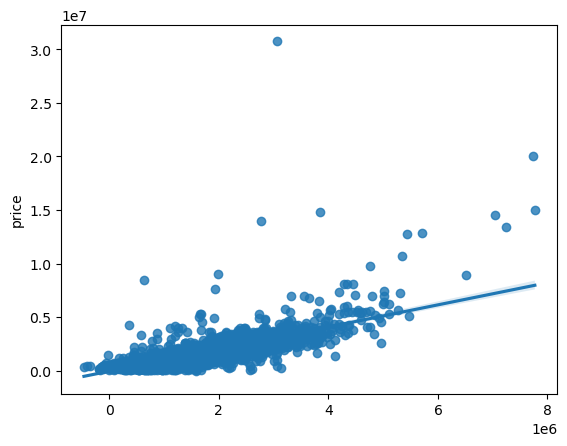

In [166]:
#Predicted vs actual on the test
sns.regplot(x = ss_preds, y = y_test);

This is the predicted price of our model versus the 

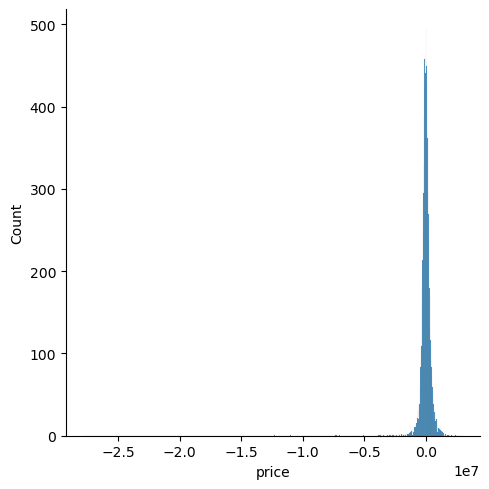

In [167]:
#Distribution of residuals of the 
sns.displot(ss_preds - y_test);

In [169]:
import pickle

In [187]:
list(x.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'long',
 'distance_to_amazon',
 'grade',
 'condition',
 'view',
 'waterfront_NO',
 'waterfront_YES',
 'greenbelt_NO',
 'greenbelt_YES',
 'nuisance_NO',
 'nuisance_YES',
 'heat_source_Electricity',
 'heat_source_Electricity/Solar',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'heat_source_Oil',
 'heat_source_Oil/Solar',
 'heat_source_Other',
 'sewer_system_PRIVATE',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'sewer_system_PUBLIC RESTRICTED',
 'zip_code_98001',
 'zip_code_98002',
 'zip_code_98003',
 'zip_code_98004',
 'zip_code_98005',
 'zip_code_98006',
 'zip_code_98007',
 'zip_code_98008',
 'zip_code_98010',
 'zip_code_98011',
 'zip_code_98014',
 'zip_code_98019',
 'zip_code_98022',
 'zip_code_98023',
 'zip_code_98024',
 'zip_code_98027',
 'zip_code_98028',
 'zip_code_98029',
 'zip_code_98030',
 'zip_code_98031',
 'zip_cod

In [188]:
list(X_train.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'distance_to_amazon',
 'grade',
 'condition',
 'view',
 'waterfront_NO',
 'waterfront_YES',
 'greenbelt_NO',
 'greenbelt_YES',
 'nuisance_NO',
 'nuisance_YES',
 'heat_source_Electricity',
 'heat_source_Electricity/Solar',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'heat_source_Oil',
 'heat_source_Oil/Solar',
 'heat_source_Other',
 'sewer_system_PRIVATE',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'sewer_system_PUBLIC RESTRICTED',
 'zip_code_98001',
 'zip_code_98002',
 'zip_code_98003',
 'zip_code_98004',
 'zip_code_98005',
 'zip_code_98006',
 'zip_code_98007',
 'zip_code_98008',
 'zip_code_98010',
 'zip_code_98011',
 'zip_code_98014',
 'zip_code_98019',
 'zip_code_98022',
 'zip_code_98023',
 'zip_code_98024',
 'zip_code_98027',
 'zip_code_98028',
 'zip_code_98029',
 'zip_code_98030',
 'zip_code_98031',
 

In [193]:
pickle.dump(full_data, open('df.pkl','wb'))

In [213]:
pickle.dump(lr, open('model.pkl','wb'))

In [212]:
pickle.dump(ss, open('scaler.pkl','wb'))

In [178]:
cleandf['price'].median()

869000.0

In [194]:
testing_data = cleandf.drop(columns = ['id', 'index', 'address','sqft_garage', 'location']).columns
full_data = cleandf[col_select]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
0,4,1.0,1180,7140,1.0,1180,0,40,1969,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2.5,2770,6703,1.0,1570,1570,240,1950,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,2.0,2880,6156,1.0,1580,1580,0,1956,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,2160,1400,2.0,1090,1070,270,2010,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2.0,1120,758,2.0,1120,550,30,2012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,5,2.0,1910,4000,1.5,1600,1130,210,1921,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29145,3,2.0,2020,5800,2.0,2020,0,520,2011,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29146,3,2.0,1620,3600,1.0,940,920,110,1995,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29147,3,2.5,2570,2889,2.0,1830,740,100,2006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
full_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288
0,4,1.0,1180,7140,1.0,1180,0,40,1969,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2.5,2770,6703,1.0,1570,1570,240,1950,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,2.0,2880,6156,1.0,1580,1580,0,1956,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,2160,1400,2.0,1090,1070,270,2010,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2.0,1120,758,2.0,1120,550,30,2012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,5,2.0,1910,4000,1.5,1600,1130,210,1921,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29145,3,2.0,2020,5800,2.0,2020,0,520,2011,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29146,3,2.0,1620,3600,1.0,940,920,110,1995,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29147,3,2.5,2570,2889,2.0,1830,740,100,2006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
a = full_data.iloc[:1, :]

In [201]:
ss.transform(a)

array([[ 5.74482278e-01, -1.48380128e+00, -9.70202904e-01,
        -1.59310885e-01, -9.48863399e-01, -7.31888894e-01,
        -8.19274154e-01, -7.10352074e-01, -1.52978658e-01,
        -2.20728784e-01, -5.62176210e-01,  1.74173698e-01,
         6.19578725e-02, -5.52651623e-01,  7.27584150e-01,
        -3.48139728e-01,  1.32492863e-01, -1.32492863e-01,
         1.62986813e-01, -1.62986813e-01,  4.54322871e-01,
        -4.54322871e-01, -5.08043576e-01, -4.26223440e-02,
         6.73258014e-01, -5.56524291e-02, -3.35380732e-01,
        -1.21264840e-02, -2.42583195e-02, -4.13718379e-01,
        -1.21264840e-02,  4.14124510e-01, -9.90099010e-03,
        -1.43733422e-01, -1.14051066e-01, -1.23595760e-01,
        -1.08637208e-01, -7.65924523e-02, -1.32684238e-01,
        -6.91135153e-02, -1.17314140e-01, -1.04401736e-01,
        -9.77202914e-02, -7.42927757e-02, -9.05670555e-02,
        -1.25018665e-01, -1.53215927e-01, -6.23445175e-02,
        -1.12050025e-01, -1.12050025e-01, -1.05594534e-0

In [ ]:
lr.predict()

In [283]:
cleandf.loc[0]

index                      0
id                7399300360
price               675000.0
bedrooms                   4
bathrooms                1.0
                     ...    
zip_code_98188           0.0
zip_code_98198           0.0
zip_code_98199           0.0
zip_code_98224           0.0
zip_code_98288           0.0
Name: 0, Length: 115, dtype: object

In [ ]:
[98102, 98109, 98112, 98119, 98122, 98144]

In [293]:

houses_2_mi_from_amzn = dist

In [295]:
dist[dist['bedrooms'] >= 2]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location,distance_to_amazon
88,9828702665,1061000.0,3,2.5,1490,959,2.0,NO,NO,NO,...,0,0,2005,0,"1826B 24th Ave, Seattle, Washington 98122, Uni...",47.618300,-122.301050,98122,"(47.6183, -122.30105)",1.804614
195,3319502178,782000.0,3,3.5,1440,2041,2.0,NO,NO,NO,...,200,0,2006,0,"1629 South Weller Street, Seattle, Washington ...",47.597320,-122.310205,98144,"(47.59732, -122.310205)",1.867842
202,8873000062,4885000.0,4,3.5,4130,7655,2.0,NO,NO,NO,...,0,530,1925,0,"119 Tower Place, Seattle, Washington 98109, Un...",47.630445,-122.354770,98109,"(47.630445, -122.35477)",1.242445
214,6852700115,1140000.0,4,2.5,1830,2680,2.0,NO,NO,YES,...,0,70,1906,0,"433 12th Avenue East, Seattle, Washington 9810...",47.622985,-122.317000,98102,"(47.622985, -122.317)",1.164362
215,3325049068,845000.0,3,3.0,1590,1071,2.0,NO,NO,YES,...,220,0,2005,0,"1746 23rd Avenue, Seattle, Washington 98122, U...",47.617535,-122.302115,98122,"(47.617535, -122.302115)",1.750555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29944,1710400050,1100000.0,4,2.5,1920,3200,2.0,NO,NO,YES,...,0,220,1900,0,"800 14th Avenue, Seattle, Washington 98122, Un...",47.609365,-122.313815,98122,"(47.609365, -122.313815)",1.277489
30052,4226900211,820000.0,3,2.0,1600,1489,2.0,NO,NO,YES,...,0,550,2016,0,"210 14th Avenue, Seattle, Washington 98122, Un...",47.603850,-122.313935,98122,"(47.60385, -122.313935)",1.448632
30083,1860600140,3395000.0,4,4.5,4390,5300,3.0,NO,NO,NO,...,500,950,1991,0,"1624 8th Avenue West, Seattle, Washington 9811...",47.634320,-122.367305,98119,"(47.63432, -122.367305)",1.827032
30105,6003501586,1384375.0,4,3.0,2010,3200,1.5,NO,NO,YES,...,0,70,1901,1988,"1122 East John Street, Seattle, Washington 981...",47.620125,-122.317155,98102,"(47.620125, -122.317155)",1.086918


In [ ]:
fig,ax = plt.subplots()
